In [1]:
from SAES.plots.critical_distance_plot import CDplot
from SAES.latex_generation.latex_skeleton import generate_latex_table
from SAES.utils.csv_processor import obtain_list_metrics
from SAES.utils.csv_processor import obtain_list_instances
from SAES.plots.boxplot import boxplot_all_instances_grid
from SAES.latex_generation.__init__ import TableTypes

import pandas as pd

In [2]:
# Load the experiment data
experimentData = pd.read_csv('ZCATSummary.csv')
metrics = pd.read_csv('multiobjectiveMetrics.csv')

metrics_list = obtain_list_metrics(metrics)
instances = obtain_list_instances(experimentData)

# IGD+

In [3]:
metric = "IGD+"

In [4]:
def highlight_max(s):
    is_min = s[:-1] == s[:-1].max() 
    return ['background-color: green' if v else '' for v in is_min] + ['']

df = generate_latex_table(experimentData, metrics, metric, TableTypes.FRIEDMAN.value, show=True)

# Aplicar el formato exponencial solo a las columnas numéricas
styled_df = df.style.apply(highlight_max, axis=1)

# Formatear solo las columnas numéricas en notación científica
styled_df.format({col: "{:.4e}" for col in df.select_dtypes(include=["number"]).columns})

,MOEAD,MOEADDE,NSGAII,NSGAIIDE,SMPSO,friedman
ZCAT1,3.2199e-03,4.6232e-03,4.6617e-03,3.0382e-03,3.0574e-03,+
ZCAT2,3.8488e-03,5.1695e-03,3.5367e-03,2.3758e-03,2.5004e-03,+
ZCAT3,3.1849e-03,4.8065e-03,4.6737e-03,2.9668e-03,3.1969e-03,+
ZCAT4,3.0858e-03,4.8128e-03,4.6061e-03,2.9866e-03,3.2288e-03,+
ZCAT5,9.5282e-03,4.1167e-03,2.5361e-03,2.0013e-03,1.9057e-03,+
ZCAT6,4.3714e-03,1.3931e-03,1.3290e-03,1.7512e-03,1.1662e-03,+
ZCAT7,2.4222e-03,4.7612e-03,3.0110e-03,2.4864e-03,2.3802e-03,+
ZCAT8,3.1892e-03,3.8343e-03,3.4319e-03,2.3806e-03,2.3956e-03,+
ZCAT9,3.3454e-03,3.8292e-03,3.3340e-03,2.3998e-03,2.4057e-03,+
ZCAT10,2.9996e-03,2.2521e-03,1.6890e-03,1.9028e-03,1.4133e-03,+


In [5]:
df_wilcoxon = generate_latex_table(experimentData, metrics, metric, TableTypes.WILCOXON.value, show=True)
styled_wilcoxon = df_wilcoxon.style.set_properties(**{'font-size': '20px'})
styled_wilcoxon

,NSGAII,NSGAIIDE,MOEAD,MOEADDE,SMPSO
NSGAII,,+++++-+++-++++++++++,+-++--=+=-++-++=-=+=,=-------------------,++++++++++++++++++++
NSGAIIDE,,,=-==--=----------=+=,-----+--------------,=---=+===+=====++===
MOEAD,,,,----++---+------+--=,=+==++=++++++++++=-+
MOEADDE,,,,,++++++++++++++++++++
SMPSO,,,,,


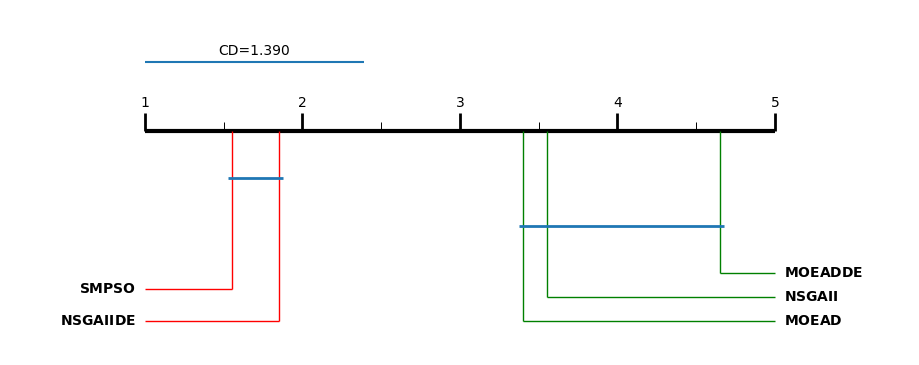

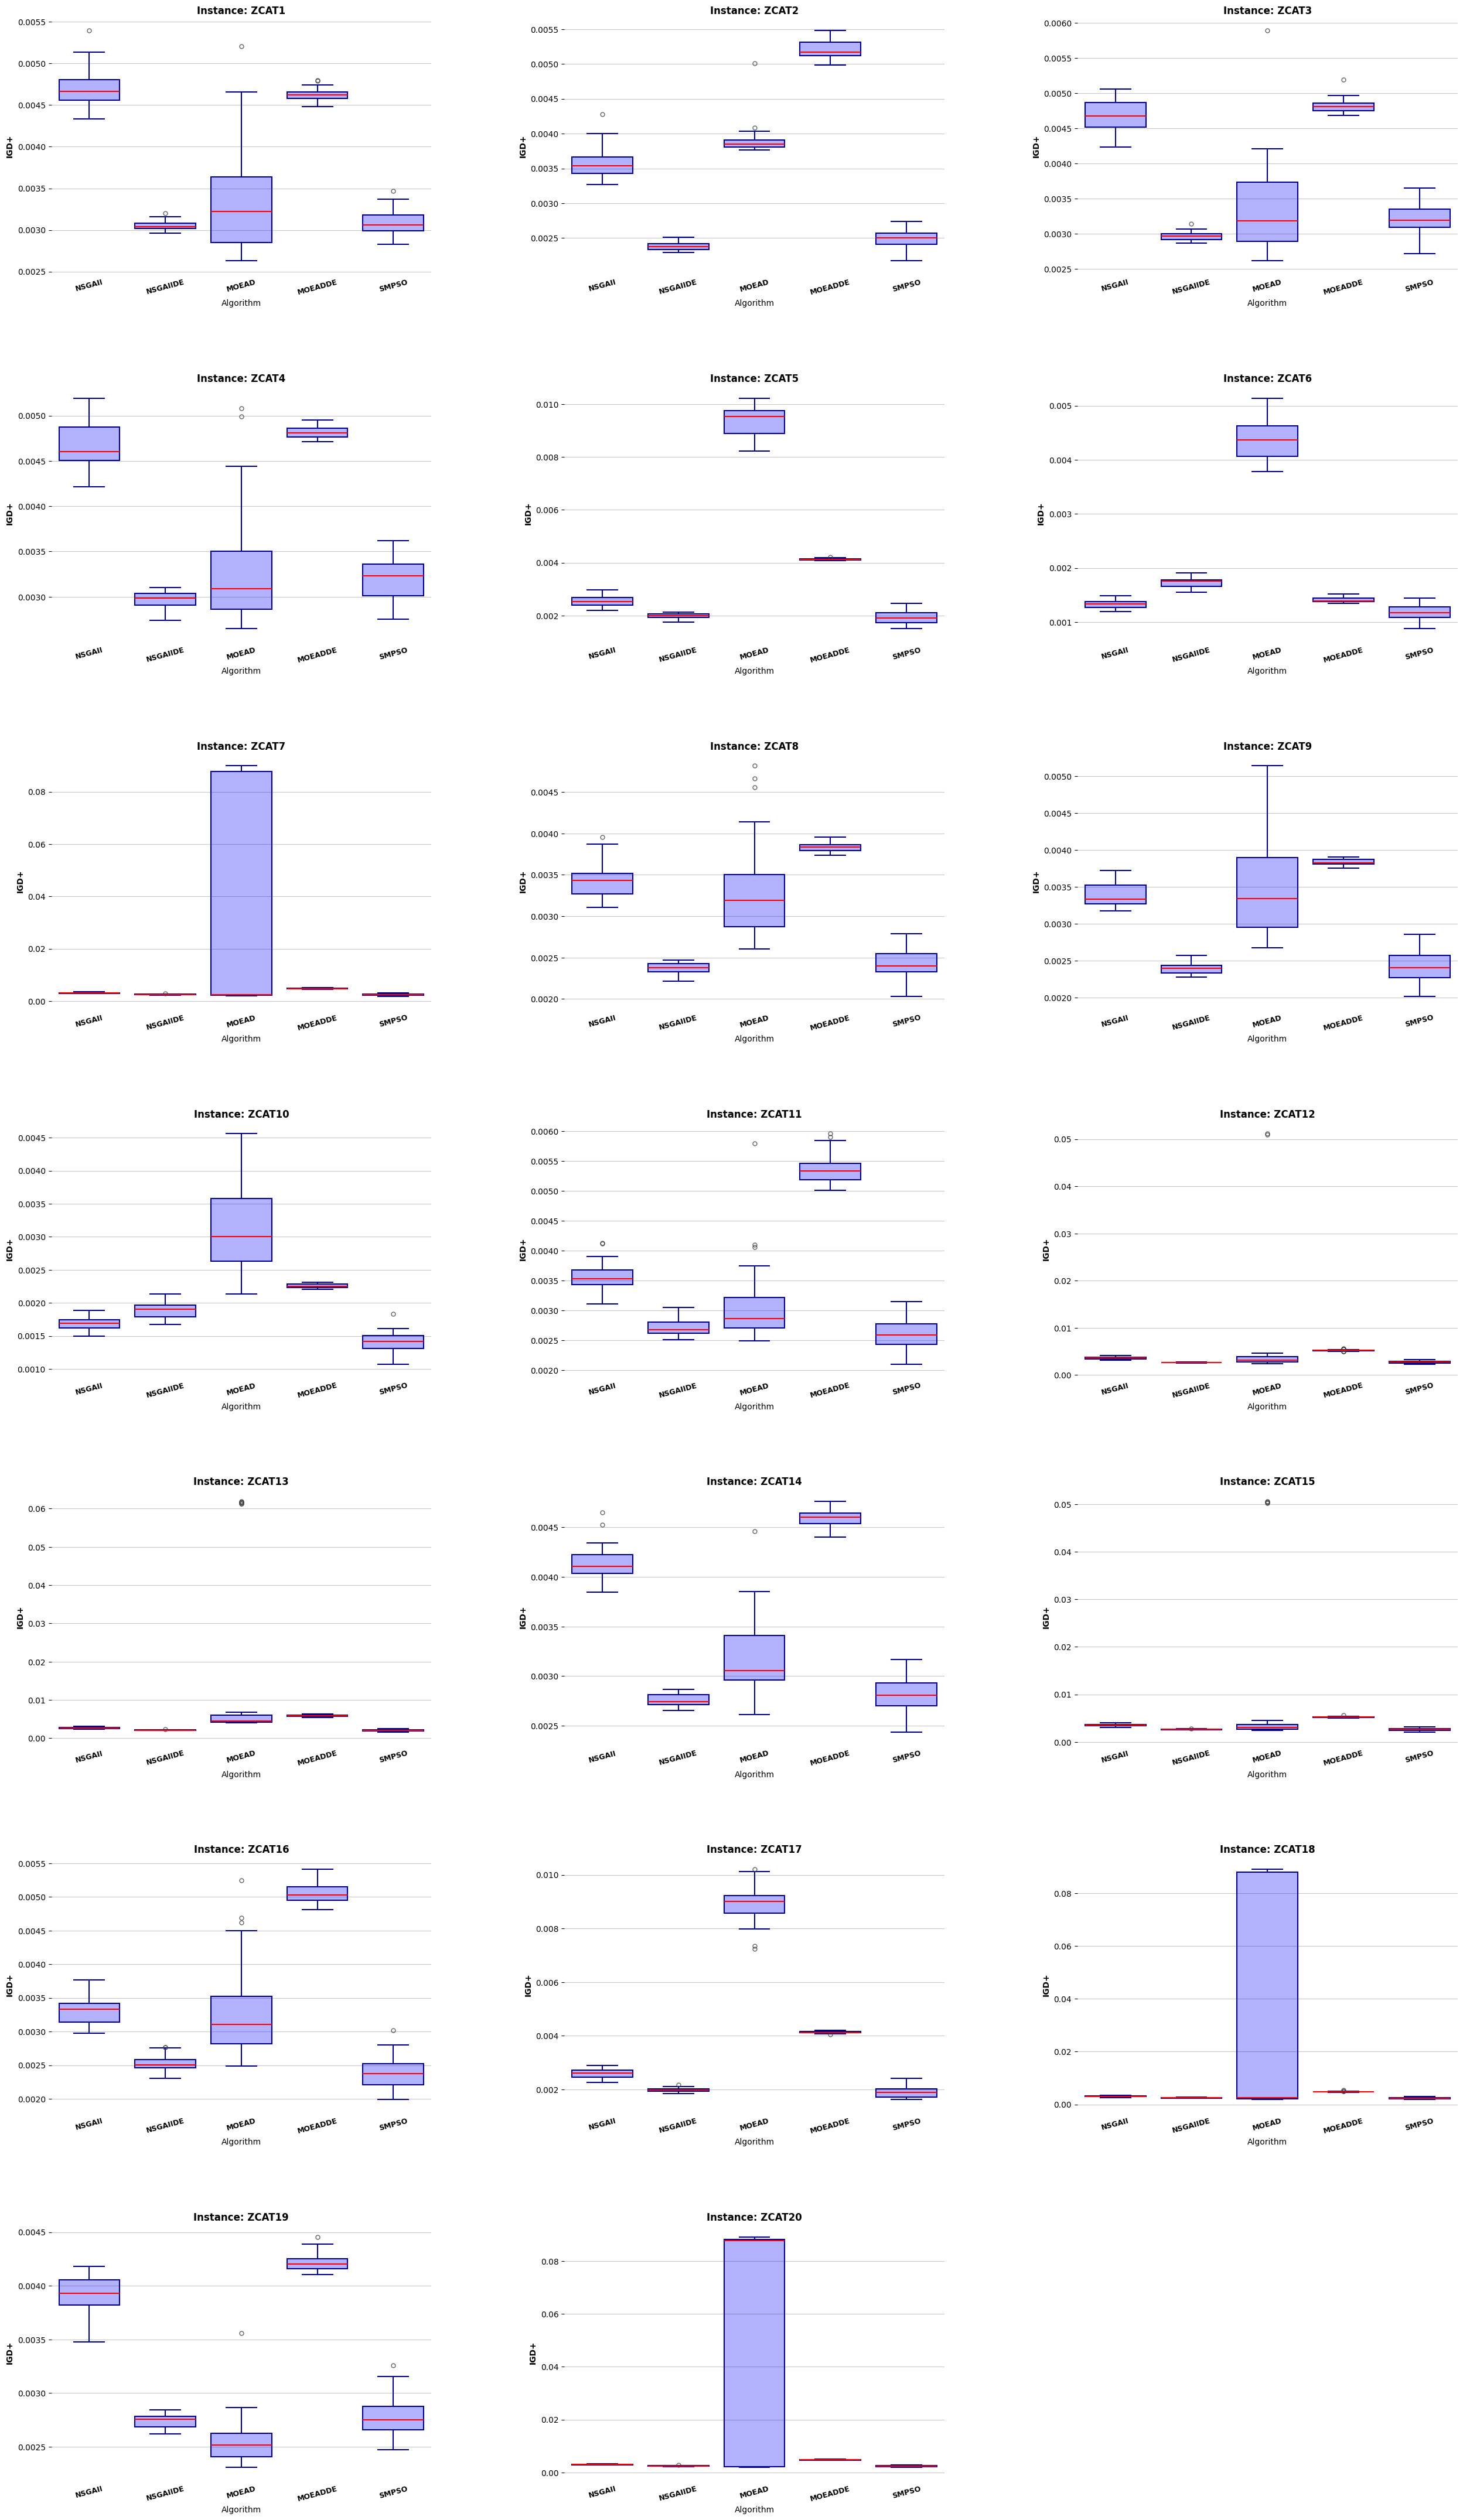

In [8]:
CDplot(experimentData, metrics, metric, show=True)
boxplot_all_instances_grid(experimentData, metrics, metric, show=True)